In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# import custom modules
import prep.prep_data as prep
import prep.prep_cv as cv

In [2]:
df = prep.read_then_clean('C:/Users/13706/OneDrive - UW/Desktop/583/project/housing_data.csv',
                          ['housing_roof', 'housing_wall', 'housing_floor'],
                          ['MACRO_DHS'])

~begin reading
data read!
~begin cleaning
data clean!
~applying filter


In [3]:
df_clean = prep.remove_garbage_codes(df, 
                                     ['housing_roof', 'housing_wall', 'housing_floor'],
                                     ['nan', 'other', 'not a dejure resident', 'not dejure resident','NaN'])

{'nan': nan, 'other': nan, 'not a dejure resident': nan, 'not dejure resident': nan, 'NaN': nan}
removing garbage from  housing_roof
removing garbage from  housing_wall
removing garbage from  housing_floor


In [4]:
df_clean = prep.extract_ranking(df_clean, ['housing_roof_num', 'housing_wall_num', 'housing_floor_num'])

defining ranking for  housing_roof_num
defining ranking for  housing_wall_num
defining ranking for  housing_floor_num


In [5]:
df_clean = prep.remove_garbage_codes(df_clean, 
                                     ['housing_roof_rank', 'housing_wall_rank', 'housing_floor_rank'],
                                     ['4', '5', '6', '7', '8', '9', 'n','nan'])

{'4': nan, '5': nan, '6': nan, '7': nan, '8': nan, '9': nan, 'n': nan, 'nan': nan}
removing garbage from  housing_roof_rank
removing garbage from  housing_wall_rank
removing garbage from  housing_floor_rank


In [6]:
# change the varibale type from object to float
df_clean['housing_roof_rank'] = pd.to_numeric(df_clean['housing_roof_rank'].str.replace(' ', ' '),errors = 'force')
df_clean['housing_wall_rank'] = pd.to_numeric(df_clean['housing_wall_rank'].str.replace(' ', ' '),errors = 'force')
df_clean['housing_floor_rank'] = pd.to_numeric(df_clean['housing_floor_rank'].str.replace(' ', ' '),errors = 'force')

In [7]:
# 
df1 = df_clean['housing_roof_rank'] 
df2 = df_clean['housing_floor_rank']
df3 = df_clean['housing_wall_rank']

In [8]:
df1.fillna(4,inplace = True)
df1.unique()
df1.value_counts()

3.0    290790
1.0     82220
4.0     78375
2.0     53427
Name: housing_roof_rank, dtype: int64

In [9]:
df2.fillna(4,inplace = True)
df2.unique()
df2.value_counts()

3.0    265596
1.0    179675
2.0     51238
4.0      8303
Name: housing_floor_rank, dtype: int64

In [10]:
df3.fillna(4,inplace = True)
df3.unique()
df3.value_counts()

3.0    236884
2.0    112616
4.0     84286
1.0     71026
Name: housing_wall_rank, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017BA094F9E8>]],
      dtype=object)

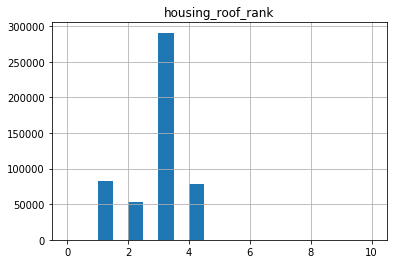

In [11]:
# the distribution of housing_roof_num
df_clean.hist(column = 'housing_roof_rank', bins=20, rwidth=1, range=[0,10])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017BACA39630>]],
      dtype=object)

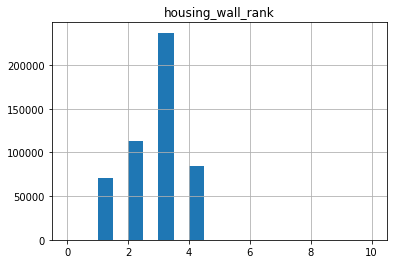

In [12]:
# the distribution of housing_wall_num
df_clean.hist(column = 'housing_wall_rank', bins = 20,rwidth=1, range=[0,10])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017BAD3EF5F8>]],
      dtype=object)

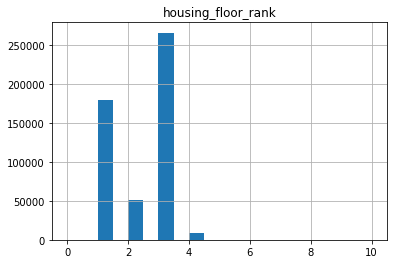

In [13]:
# the distribution of housing_floor_num
df_clean.hist(column = 'housing_floor_rank', bins=20,rwidth=1, range=[0,10])

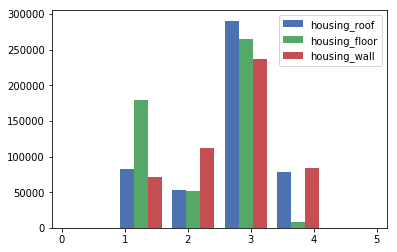

In [14]:
# Histogram
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

x = df1
y = df2
z = df3
bins = np.linspace(0,5,7)

plt.hist([x, y,z], bins, label=['housing_roof', 'housing_floor','housing_wall'])
plt.legend(loc='upper right')
plt.show()

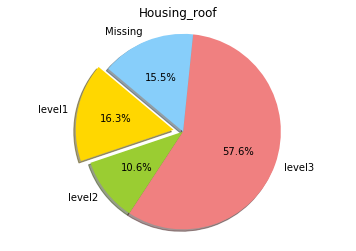

In [15]:
import matplotlib.pyplot as plt

labels = 'level1', 'level2', 'level3', 'Missing'
sizes = [82220,  53427, 290790, 78375]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Housing_roof')
plt.show()

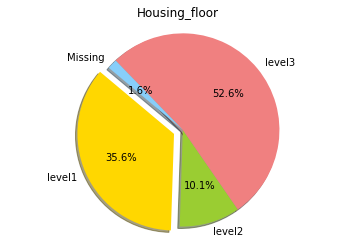

In [16]:
import matplotlib.pyplot as plt

labels = 'level1', 'level2', 'level3', 'Missing'
sizes = [179675,  51238, 265596, 8308]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Housing_floor')
plt.show()

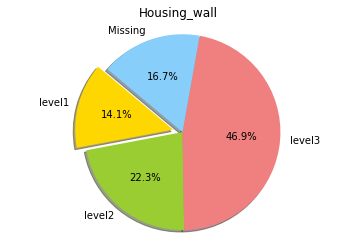

In [17]:
import matplotlib.pyplot as plt

labels = 'level1', 'level2', 'level3', 'Missing'
sizes = [71062,  112616, 236884, 84286]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Housing_wall')
plt.show()

In [18]:
# change the varibale type from object to float
df_clean['housing_roof_num'] = pd.to_numeric(df_clean['housing_roof_num'].str.replace(' ', ' '),errors = 'force')
df_clean['housing_wall_num'] = pd.to_numeric(df_clean['housing_wall_num'].str.replace(' ', ' '),errors = 'force')
df_clean['housing_floor_num'] = pd.to_numeric(df_clean['housing_floor_num'].str.replace(' ', ' '),errors = 'force')

In [20]:
# make new data frame
df11 = df_clean[(df_clean['housing_roof_num'] < 39) & (df_clean['housing_roof_num'] > 11)]
df12 = df11[(df11['housing_wall_num'] < 39) & (df11['housing_wall_num'] > 11)]
df13 = df12[(df12['housing_floor_num'] < 39) & (df12['housing_floor_num'] > 11)]

<IPython.core.display.Javascript object>


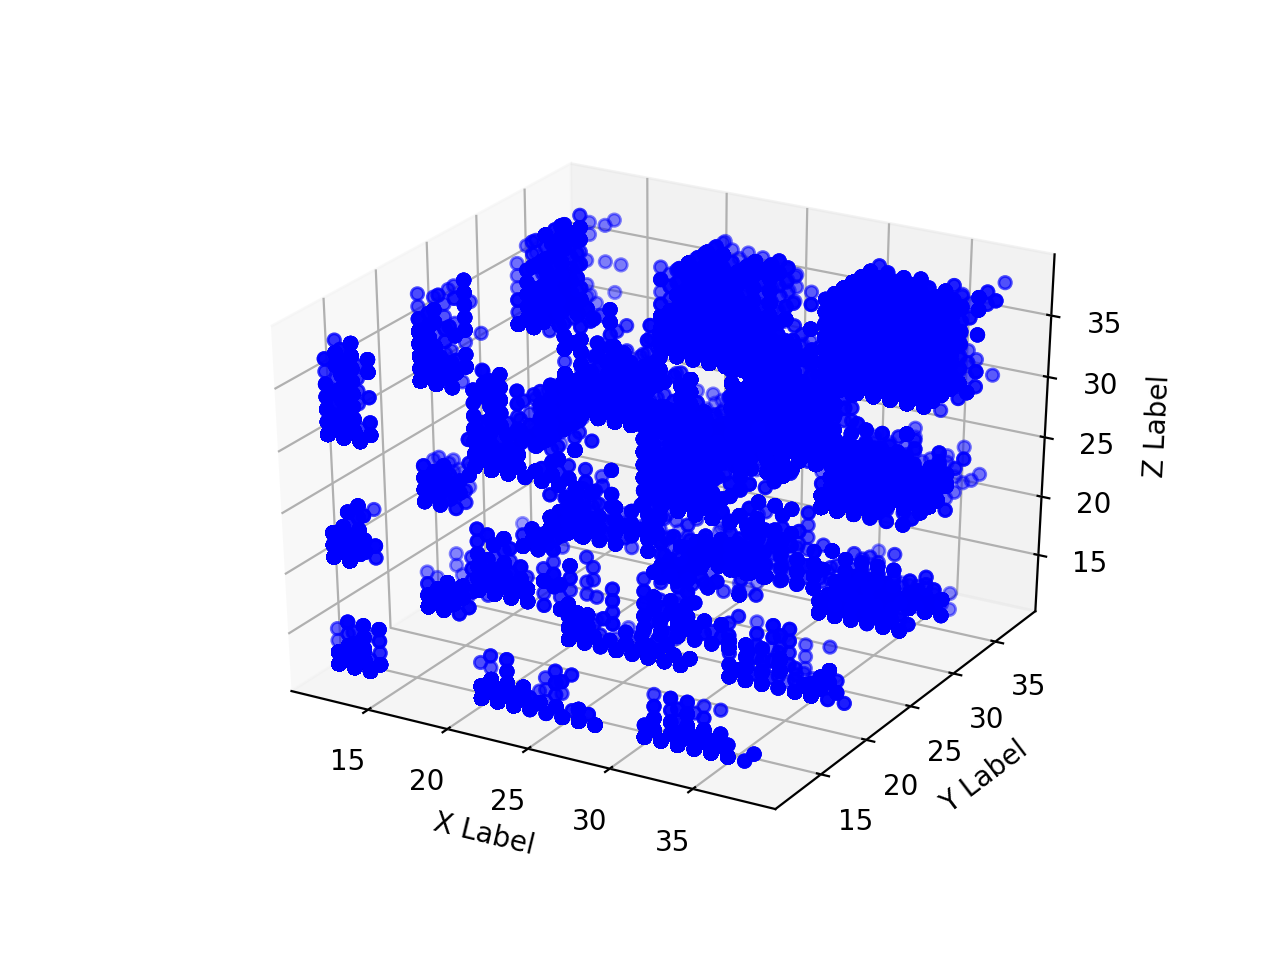

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'notebook')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =df13['housing_wall_num']
y =df13['housing_floor_num']
z =df13['housing_roof_num']

ax.scatter(x, y, z, c='b', marker='o')

ax.set_xlabel('housing_wall_num')
ax.set_ylabel('housing_floor_num')
ax.set_zlabel('housing_roof_num')

plt.show()
# from the 3d plot, we can see that there is no obvious correlationship between each variable

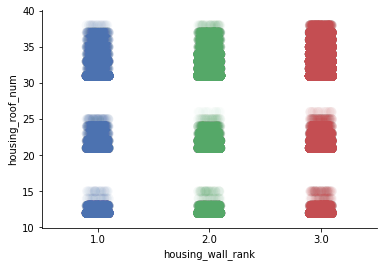

In [30]:
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
sns.stripplot(x=df13['housing_wall_rank'], y=df13['housing_roof_num'], data=df13,   
              size=10, alpha=.02, jitter=True, edgecolor='none')
sns.despine()
# 

<IPython.core.display.Javascript object>


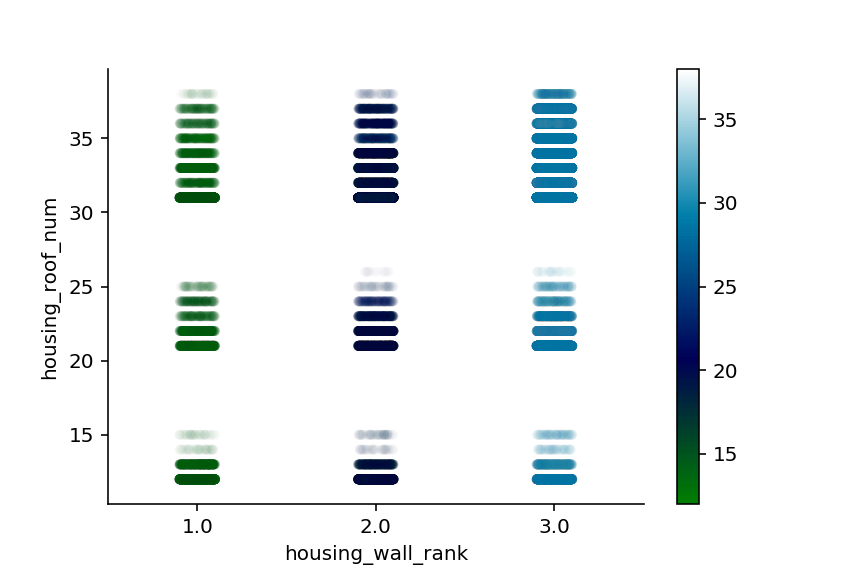

In [40]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

plot = sns.stripplot(x=df13['housing_wall_rank'], y=df13['housing_roof_num'],hue = df13['housing_wall_num'], data=df13, 
               palette  = 'ocean',
              jitter=True, edgecolor='none', alpha=.02)
plot.get_legend().set_visible(False)
sns.despine()
df13.describe()

# Drawing the side color bar
normalize = mcolors.Normalize(vmin=df13['housing_wall_num'].min(), vmax=df13['housing_wall_num'].max())
colormap = cm.ocean

for n in df13['housing_wall_num']:
    plt.plot(color=colormap(normalize(n)))

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(df13['housing_roof_num'])
plt.colorbar(scalarmappaple)